In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload() #Upload file

Saving gas_turbines.csv to gas_turbines (1).csv


In [ ]:
df=pd.read_csv('gas_turbines.csv') #Read the file

In [ ]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
df.shape

(15039, 11)

In [ ]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
df.head().T

,0,1,2,3,4
AT,6.8594,6.7850,6.8977,7.0569,7.3978
AP,1007.9000,1008.4000,1008.8000,1009.2000,1009.7000
AH,96.7990,97.1180,95.9390,95.2490,95.1500
AFDP,3.5000,3.4998,3.4824,3.4805,3.4976
GTEP,19.6630,19.7280,19.7790,19.7920,19.7650
TIT,1059.2000,1059.3000,1059.4000,1059.6000,1059.7000
TAT,550.0000,550.0000,549.8700,549.9900,549.9800
TEY,114.7000,114.7200,114.7100,114.7200,114.7200
CDP,10.6050,10.5980,10.6010,10.6060,10.6120
CO,3.1547,3.2363,3.2012,3.1923,3.2484


In [ ]:
#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

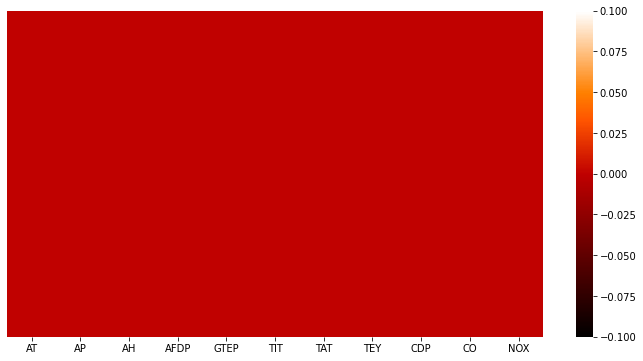

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [ ]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

#Data Visualisation

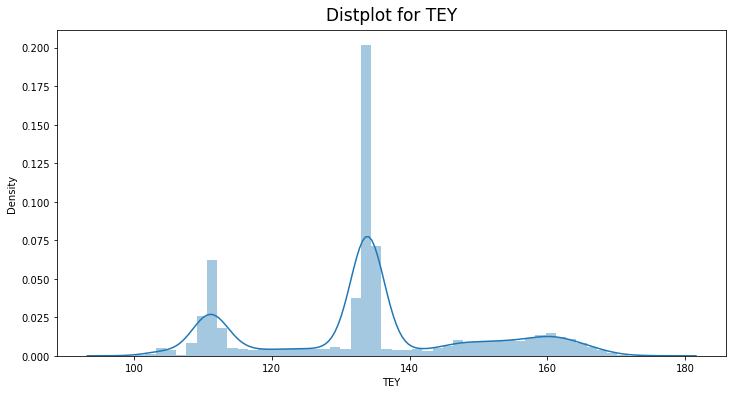

In [ ]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

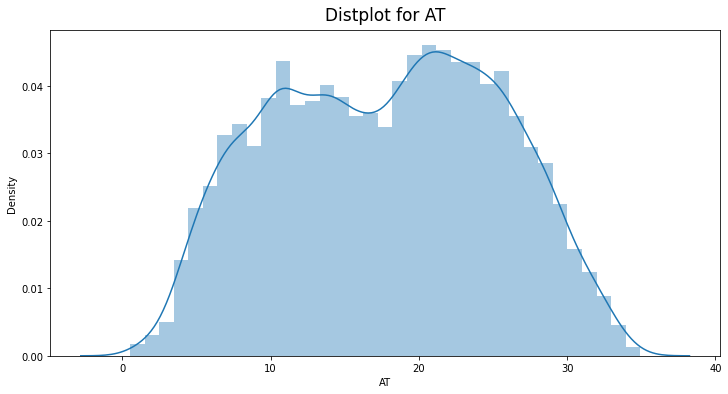

In [ ]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

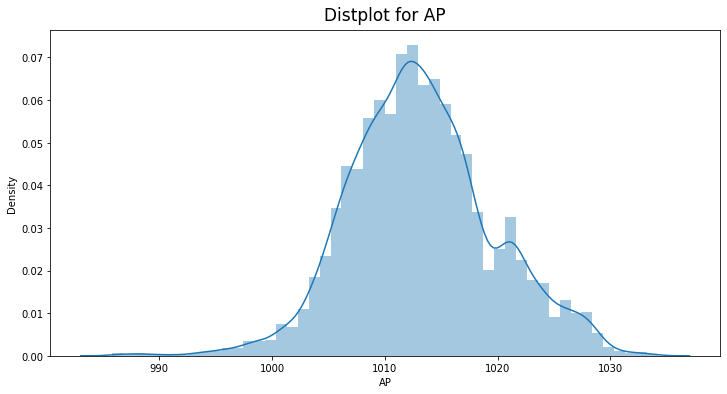

In [ ]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

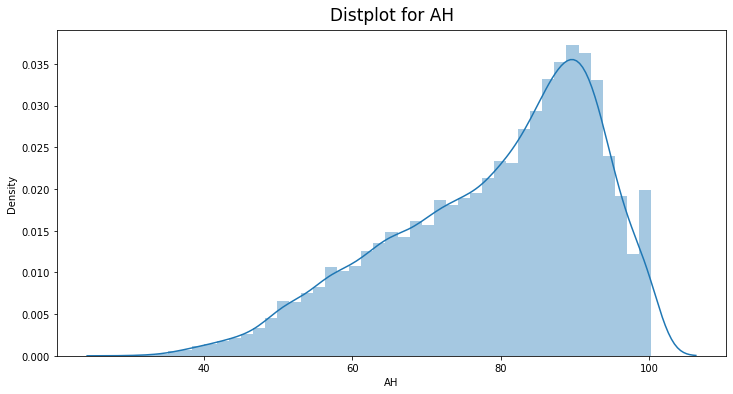

In [ ]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

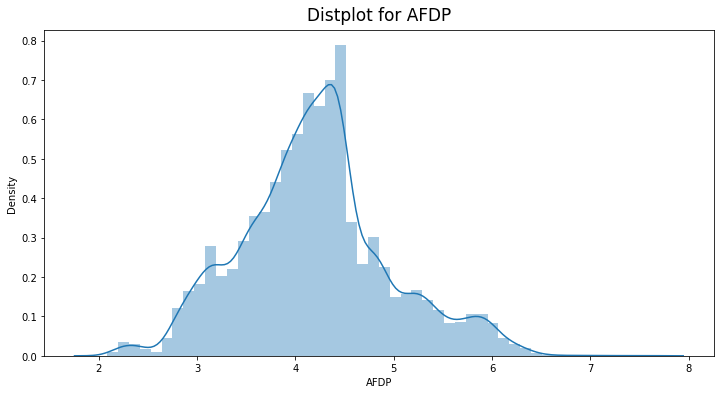

In [ ]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

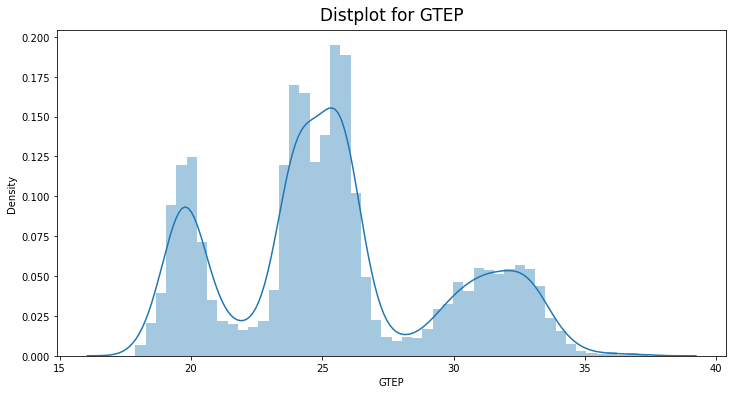

In [ ]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

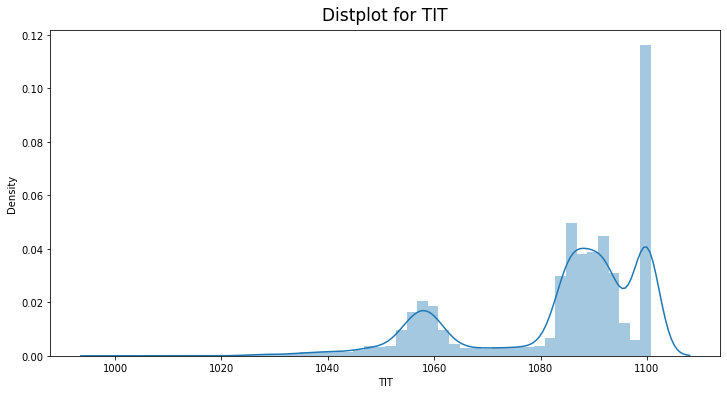

In [ ]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

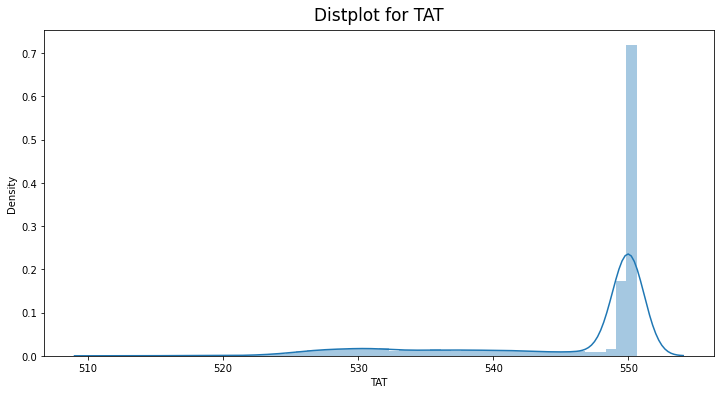

In [ ]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

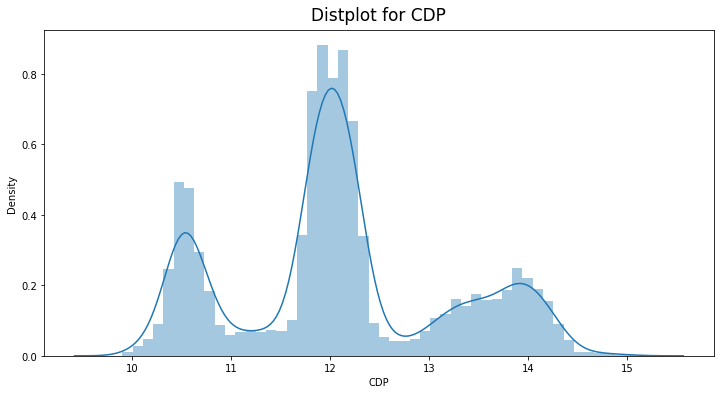

In [ ]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

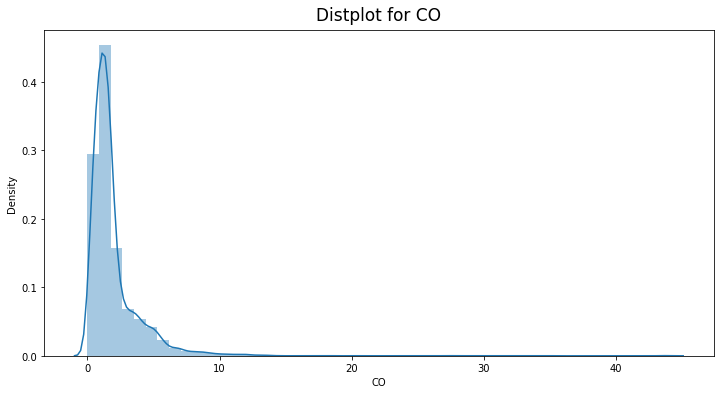

In [ ]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

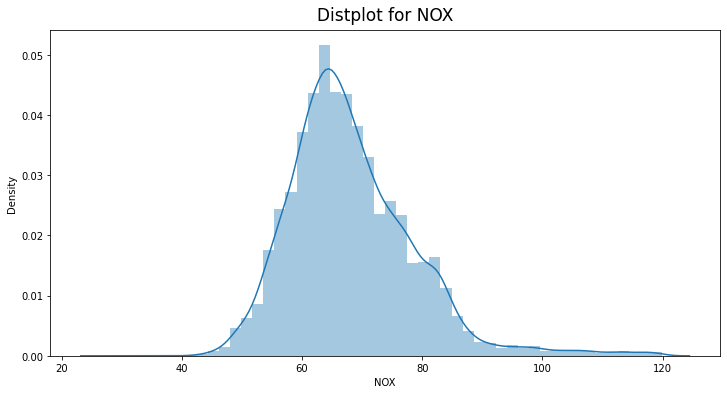

In [ ]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

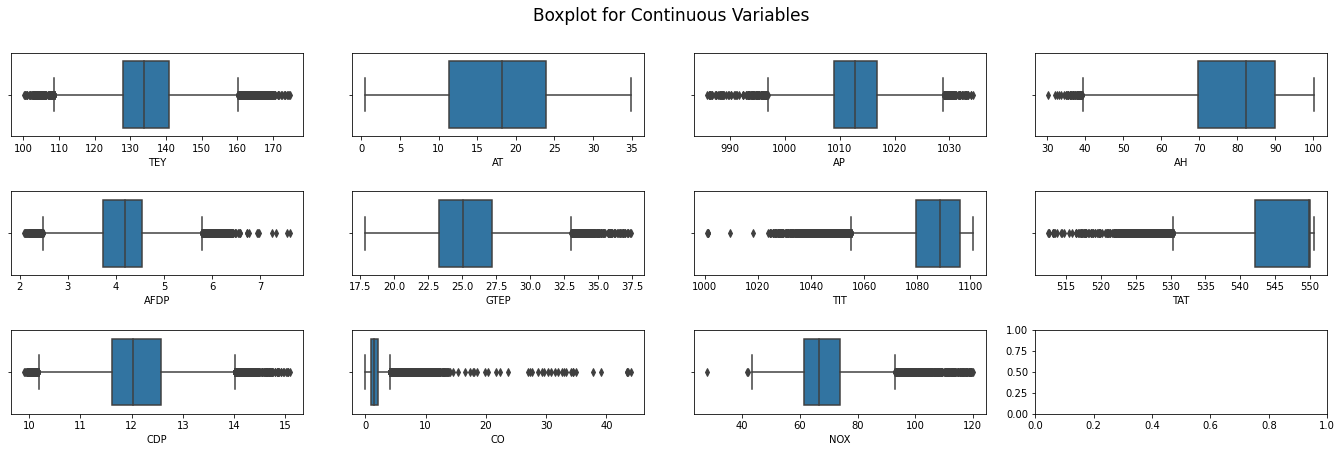

In [ ]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

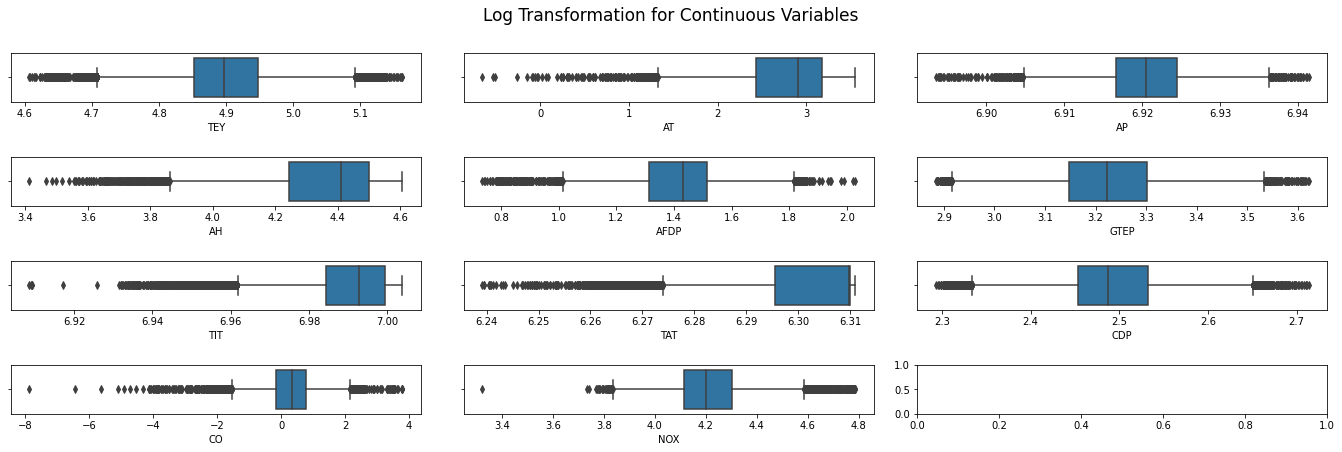

In [ ]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

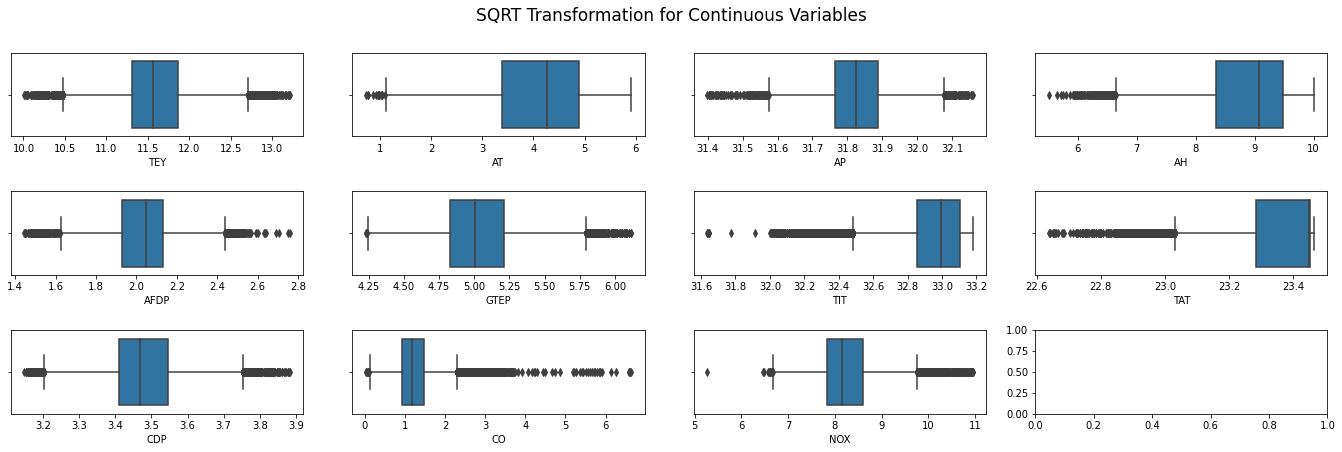

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

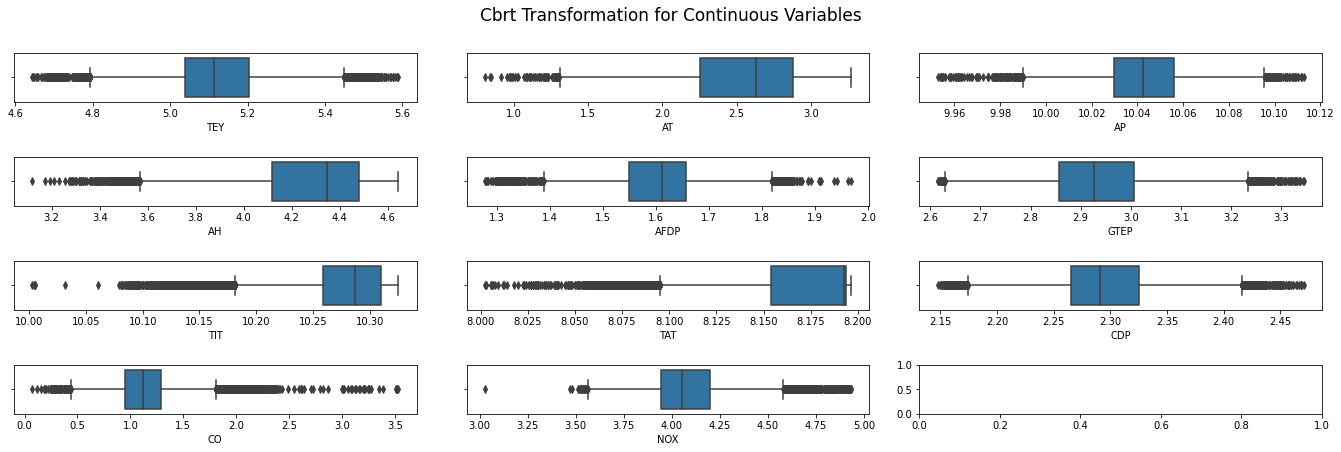

In [ ]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [ ]:
sns.pairplot(df)

In [ ]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


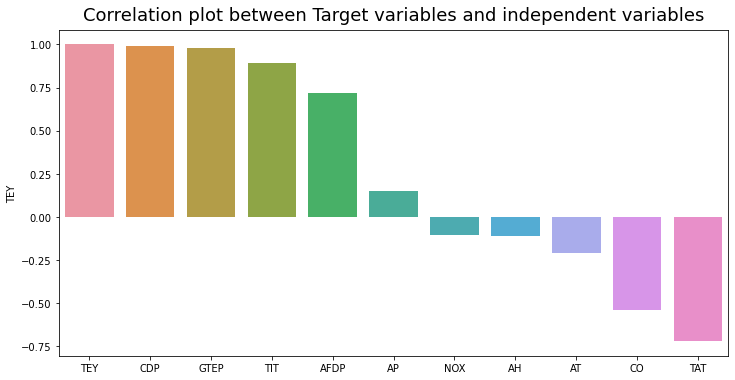

In [ ]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

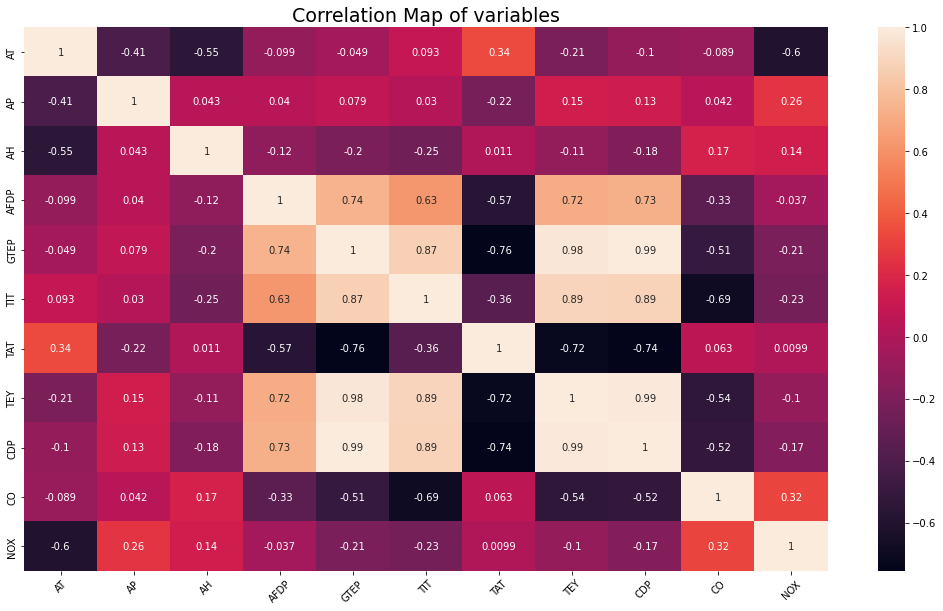

In [ ]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [ ]:
!pip install ppscore
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=9f2615a0d3b6db38f64cb5e5caf3a512357c1c45b6b957533e501cdf0af6bc7e
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

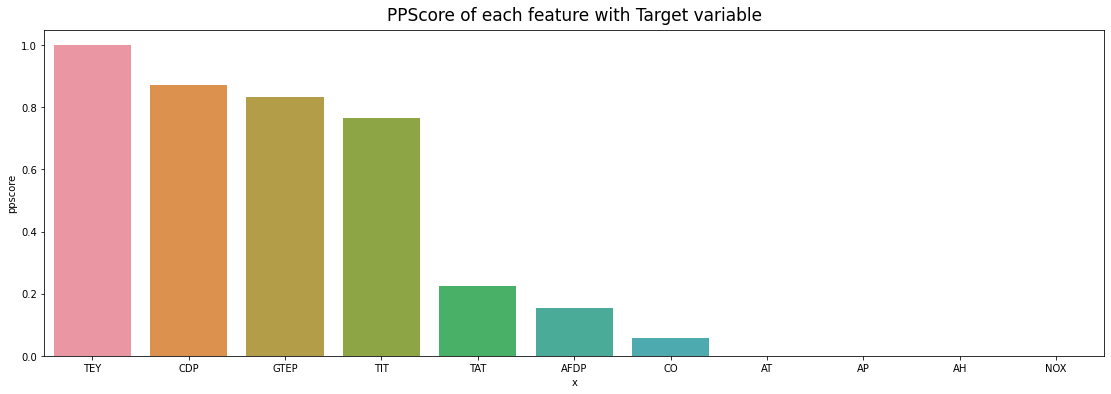

In [ ]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [ ]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


#Data Preprocessing

In [ ]:
df.shape

(15039, 11)

In [ ]:
#drop the outliers
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [ ]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [ ]:
df.shape

(15023, 7)

In [ ]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)            #data between -1 to +1

In [ ]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
2695,0.854417,1.149372,1.000825,-1.023748,1.103034,1.257990,-0.305497
7283,-1.837787,-0.411390,0.032875,0.586844,-0.023119,-0.319279,-0.102255
4537,0.079819,0.138988,0.544245,0.607231,0.062244,0.133313,-0.554879
5098,-1.064506,-1.393008,-1.665605,0.581747,-1.552056,-1.532841,1.618060
12948,-0.228572,0.107346,0.550332,0.580473,-0.030707,0.073451,-0.772065
...,...,...,...,...,...,...,...
6131,-0.650290,-1.497522,-1.799535,0.576650,-1.628566,-1.502003,1.619179
5860,0.039675,-0.371358,-0.131494,0.607231,-0.468268,-0.423583,-0.314166
4255,-0.923670,-1.271235,-1.525587,0.591941,-1.476810,-1.367768,2.261343
10743,-1.496491,-1.245825,-1.422095,0.585570,-1.397139,-1.193624,0.277852


In [ ]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
2695,0.854417,1.149372,1.000825,-1.023748,1.257990,-0.305497
7283,-1.837787,-0.411390,0.032875,0.586844,-0.319279,-0.102255
4537,0.079819,0.138988,0.544245,0.607231,0.133313,-0.554879
5098,-1.064506,-1.393008,-1.665605,0.581747,-1.532841,1.618060
12948,-0.228572,0.107346,0.550332,0.580473,0.073451,-0.772065
...,...,...,...,...,...,...
6131,-0.650290,-1.497522,-1.799535,0.576650,-1.502003,1.619179
5860,0.039675,-0.371358,-0.131494,0.607231,-0.423583,-0.314166
4255,-0.923670,-1.271235,-1.525587,0.591941,-1.367768,2.261343
10743,-1.496491,-1.245825,-1.422095,0.585570,-1.193624,0.277852


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

In [ ]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [ ]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: user

In [ ]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 180ms/step


array([[-1.9681079 ],
       [-1.4621181 ],
       [-0.01161194],
       [-1.4842196 ],
       [-1.4575875 ],
       [ 1.1856902 ],
       [ 1.9445667 ],
       [-0.05244622],
       [-0.01857725],
       [ 1.5970407 ]], dtype=float32)

In [ ]:
print('Actual values')
y_test[:10]

Actual values


2139    -1.908049
2248    -1.476810
5583    -0.031339
13192   -1.424328
12888   -1.458473
7832     1.209895
7755     1.933895
3087    -0.031339
11567   -0.029442
7142     1.524788
Name: TEY, dtype: float64

In [ ]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

36/36 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0424 - mape: 83.4312

 Results for model 2: 
 Training Loss: 0.0035370425321161747 
 Training Mean Absolute Error: 0.0035370425321161747 
 Training Mean Squared Error: 0.04243241250514984


In [ ]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

12/12 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0604 - mape: 77.2909

 Results for model 2: 
 Test Loss: 0.012488842010498047 
 Test Mean Absolute Error: 0.012488842010498047 
 Test Mean Squared Error: 0.060428112745285034


#Hyperparameter Tuning to get best options for:

In [ ]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.010 total time=  21.9s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.009 total time=  21.4s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.013 total time=  17.1s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.006 total time=  21.4s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.018 total time=  19.2s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007928578741848468, using {'batch_size': 70, 'epochs': 500}
-0.011229390371590852,0.004025188988082109 with: {'batch_size': 30, 'epochs': 300}
-0.009366494417190552,0.0019559137303157125 with: {'batch_size': 30, 'epochs': 500}
-0.012832546699792146,0.006753000940113533 with: {'batch_size': 30, 'epochs': 800}
-0.01107419803738594,0.0031288320485341474 with: {'batch_size': 50, 'epochs': 300}
-0.013908386509865523,0.00600431617941978 with: {'batch_size': 50, 'epochs': 500}
-0.011624427977949381,0.00619192779829602 with: {'batch_size': 50, 'epochs': 800}
-0.009554551169276237,0.0033300977577182035 with: {'batch_size': 70, 'epochs': 300}
-0.007928578741848468,0.0011317020766379933 with: {'batch_size': 70, 'epochs': 500}
-0.011233644094318151,0.0034318456091467346 with: {'batch_size': 70, 'epochs': 800}


In [ ]:
#get best value for learning rate and dropuout by hyperparameter tuning
# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model
# Create the model
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 8min 52s, sys: 29.3 s, total: 9min 22s
Wall time: 8min 9s


In [ ]:
p# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.008648909348994493, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.008648909348994493,0.002347892067429413 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.011776654794812203,0.006326053270385938 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.4287070108577609,0.4696304670918426 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.010251736082136632,0.002629042970441919 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.014200846664607525,0.003920509250562984 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.9752221941947937,0.0571402233449153 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.011380065977573395,0.0027248248992466353 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.018589076399803162,0.0015678838985486736 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.7710001051425934,0.22972272861780327 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 1h 11min 12s, sys: 4min 2s, total: 1h 15min 15s
Wall time: 1h 7min 43s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.00695588430389762, using {'neuron1': 32, 'neuron2': 64, 'neuron3': 128, 'neuron4': 32}
-0.008141494542360305,0.0017042707027183396 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
-0.007186804339289666,0.0012151458773955542 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
-0.008812914416193963,0.0020432081959339717 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
-0.008490363787859678,0.002217169283418229 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
-0.007716791704297066,0.0016206611481602699 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
-0.007351338770240546,0.001135304775611607 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
-0.00816028770059347,0.000672815442387478 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
-0.007633755914866924,0.00120993372961857 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
-0.007762574590742588,0.0

In [ ]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of our final model:
Model: "sequential_500"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2499 (Dense)          (None, 8)                 56        
                                                                 
 dense_2500 (Dense)          (None, 128)               1152      
                                                                 
 dense_2501 (Dense)          (None, 64)                8256      
                                                                 
 dense_2502 (Dense)          (None, 128)               8320      
                                                                 
 dense_2503 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [ ]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

36/36 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0626 - mape: 140.8266

 Results for final model : 
 Training Loss: 0.007361690513789654 
 Training Mean Absolute Error: 0.007361690513789654 
 Training Mean Squared Error: 0.06260021030902863


In [ ]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)

12/12 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0699 - mape: 102.5144

 Results for final model : 
 Test Loss: 0.009123237803578377 
 Test Mean Absolute Error: 0.009123237803578377 
 Test Mean Squared Error: 0.06993135809898376
